In [1]:
# 共通事前處理
# 隱藏不必要的警告
import warnings
warnings.filterwarnings('ignore')

# 匯入必要的函式庫
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from matplotlib import font_manager as fm

# 將字型新增到 matplotlib
fm.fontManager.addfont('./TaipeiSansTCBeta-Regular.ttf')

# 用來顯示資料框的函式
from IPython.display import display

# 調整顯示選項
# NumPy 的浮點數表示精度
np.set_printoptions(suppress=True, precision=4)
# pandas 中的浮點數表示精度
pd.options.display.float_format = '{:.4f}'.format
# 顯示資料框中的所有項目
pd.set_option("display.max_columns",None)
# 指定圖形的預設字體大小
plt.rcParams["font.size"] = 14
# 指定圖形的預設字型
plt.rcParams['font.family'] = 'Taipei Sans TC Beta'
# 隨機種子
random_seed = 2277

In [2]:
#載入資料、確認資料
df = pd.read_csv('stockData/stockData.csv', parse_dates=[1])
column = ['指數代碼', '日期', '開盤價', '最高價', '最低價', '收盤價', '調整後收盤價', '交易量']
df.columns = column

display(df.head())
display(df.tail())

,指數代碼,日期,開盤價,最高價,最低價,收盤價,調整後收盤價,交易量
0,NYA,1965-12-31,528.6900,528.6900,528.6900,528.6900,528.6900,0.0000
1,NYA,1966-01-03,527.2100,527.2100,527.2100,527.2100,527.2100,0.0000
2,NYA,1966-01-04,527.8400,527.8400,527.8400,527.8400,527.8400,0.0000
3,NYA,1966-01-05,531.1200,531.1200,531.1200,531.1200,531.1200,0.0000
4,NYA,1966-01-06,532.0700,532.0700,532.0700,532.0700,532.0700,0.0000


,指數代碼,日期,開盤價,最高價,最低價,收盤價,調整後收盤價,交易量
112452,N100,2021-05-27,1241.1200,1251.9100,1241.1200,1247.0699,1247.0699,379696400.0000
112453,N100,2021-05-28,1249.4700,1259.2100,1249.0300,1256.6000,1256.6000,160773400.0000
112454,N100,2021-05-31,1256.0800,1258.8800,1248.1400,1248.9301,1248.9301,91173700.0000
112455,N100,2021-06-01,1254.6100,1265.6600,1254.6100,1258.5800,1258.5800,155179900.0000
112456,N100,2021-06-02,1258.4900,1263.7100,1258.2400,1263.6200,1263.6200,148465000.0000


In [3]:
# 確認遺失值、欲處理資料
missing_rows = df[df.isnull().any(axis=1)]
# 查看有遺失值的列(最後5列)
display(missing_rows.tail())
# 向前填充遺失值，同df.fillnu(method='ffill')
df_filled = df.ffill()
#df_filled.isnull().sum()


,指數代碼,日期,開盤價,最高價,最低價,收盤價,調整後收盤價,交易量
108316,N100,2005-03-28,NaN,NaN,NaN,NaN,NaN,NaN
108511,N100,2005-12-26,NaN,NaN,NaN,NaN,NaN,NaN
110051,N100,2012-01-02,NaN,NaN,NaN,NaN,NaN,NaN
110643,N100,2014-05-01,NaN,NaN,NaN,NaN,NaN,NaN
112090,N100,2019-12-25,NaN,NaN,NaN,NaN,NaN,NaN


In [4]:
# 欲處理資料
# 要使用Porphet需提取ds、y
df2 = df_filled.copy()
df2 = df2[['日期', '調整後收盤價']]
df2.columns = ['ds', 'y']
display(df2.head())

,ds,y
0,1965-12-31,528.6900
1,1966-01-03,527.2100
2,1966-01-04,527.8400
3,1966-01-05,531.1200
4,1966-01-06,532.0700


In [5]:
# 分割(訓練train、驗證validation、測試test)
# 日期分割
train_end_date = pd.to_datetime('2005-12-31')
validation_end_date = pd.to_datetime('2015-12-31')

# 把2005-12-31(含)前的資料指派給train_df2
train_df2 = df2[df2['ds'] <= train_end_date]
# 把2015-12-31(含)前的資料指派給validation_df2
validation_df2 = df2[(df2['ds'] <= validation_end_date) & (df2['ds'] > train_end_date)] #注意pd中的and要用'&'代替，且是優先運算因子
# 把2015-12-31(不含)後的資料指派給test_df2
test_df2 = df2[df2['ds'] > validation_end_date]

display(train_df2.tail())
display(validation_df2.head())
display(validation_df2.tail())
display(test_df2.head())

,ds,y
108511,2005-12-26,815.3000
108512,2005-12-27,817.4500
108513,2005-12-28,815.5000
108514,2005-12-29,818.3700
108515,2005-12-30,810.3500


,ds,y
10070,2006-01-03,7912.4102
10071,2006-01-04,7962.9399
10072,2006-01-05,7944.0601
10073,2006-01-06,8031.6602
10074,2006-01-09,8053.4199


,ds,y
111066,2015-12-23,910.9400
111067,2015-12-24,910.0100
111068,2015-12-28,902.4500
111069,2015-12-29,918.1100
111070,2015-12-30,914.1100


,ds,y
12587,2016-01-04,10001.5596
12588,2016-01-05,10028.0596
12589,2016-01-06,9868.2598
12590,2016-01-07,9650.4199
12591,2016-01-08,9528.7695


In [6]:
#選擇演算法
from prophet import Prophet
model = Prophet(
    yearly_seasonality=True, weekly_seasonality=True, daily_seasonality=False,
    growth='linear', seasonality_mode='multiplicative'
)
model.fit(train_df2)
print('模型已訓練完成')

Importing plotly failed. Interactive plots will not work.
19:25:41 - cmdstanpy - INFO - Chain [1] start processing
19:26:48 - cmdstanpy - INFO - Chain [1] done processing


模型已訓練完成


In [13]:
#使用驗證集來進行未來預測，Prophet 只需要 'ds' 欄位來預測
futuer_validation = validation_df2[['ds']].copy()
pred_validation = model.predict(futuer_validation)
display(pred_validation.head())

,ds,trend,yhat_lower,yhat_upper,trend_lower,trend_upper,multiplicative_terms,multiplicative_terms_lower,multiplicative_terms_upper,weekly,weekly_lower,weekly_upper,yearly,yearly_lower,yearly_upper,additive_terms,additive_terms_lower,additive_terms_upper,yhat
0,2006-01-02,1723.1779,-809.1100,12666.1302,1723.1779,1723.1779,2.3603,2.3603,2.3603,2.3516,2.3516,2.3516,0.0087,0.0087,0.0087,0.0000,0.0000,0.0000,5790.4689
1,2006-01-02,1723.1779,-864.4404,12453.7524,1723.1779,1723.1779,2.3603,2.3603,2.3603,2.3516,2.3516,2.3516,0.0087,0.0087,0.0087,0.0000,0.0000,0.0000,5790.4689
2,2006-01-02,1723.1779,-843.8761,12616.4129,1723.1779,1723.1779,2.3603,2.3603,2.3603,2.3516,2.3516,2.3516,0.0087,0.0087,0.0087,0.0000,0.0000,0.0000,5790.4689
3,2006-01-02,1723.1779,-986.8395,12310.6203,1723.1779,1723.1779,2.3603,2.3603,2.3603,2.3516,2.3516,2.3516,0.0087,0.0087,0.0087,0.0000,0.0000,0.0000,5790.4689
4,2006-01-02,1723.1779,-1131.1178,12860.0682,1723.1779,1723.1779,2.3603,2.3603,2.3603,2.3516,2.3516,2.3516,0.0087,0.0087,0.0087,0.0000,0.0000,0.0000,5790.4689


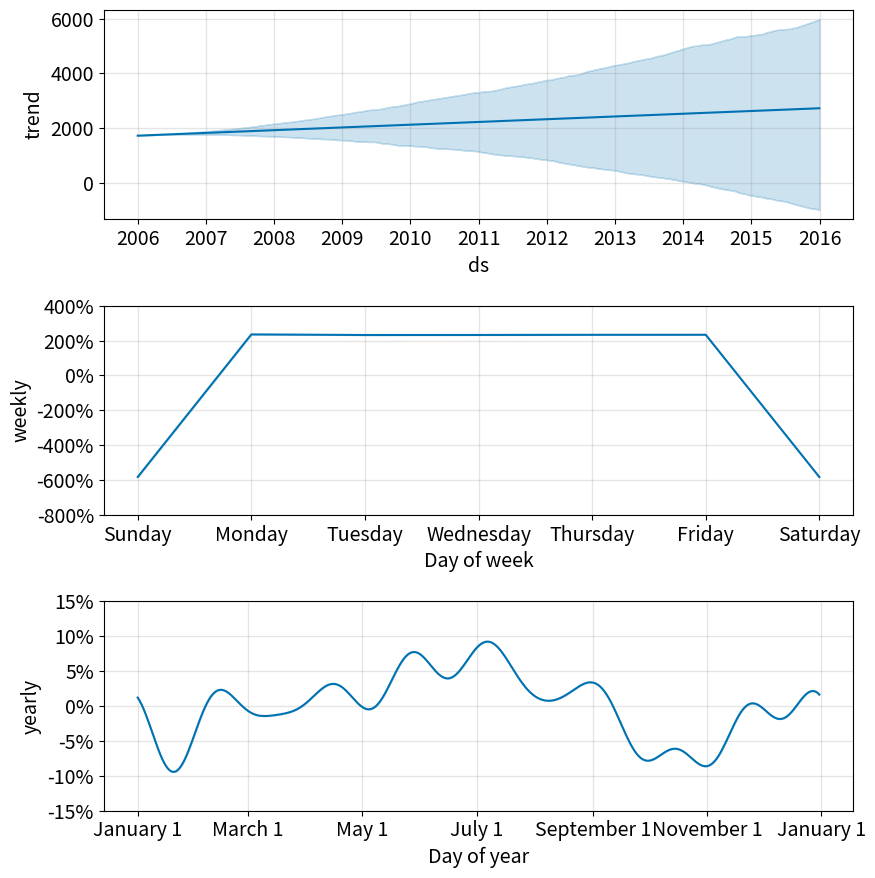

In [ ]:
# 評估繪製元素的圖形
# 現階段為趨勢、週循環及年循環
fig = model.plot_components(pred_validation)
plt.show()

In [14]:
# 準備計算R2值(決定係數)、RMSE(均方值誤差)
from sklearn.metrics import mean_squared_error, r2_score

# 評估測試集結果 (最終性能報告)
df_validation_results = validation_df2.merge(
    pred_validation[['ds', 'yhat', 'yhat_lower', 'yhat_upper']],
    on='ds',
    how='left'
).rename(columns={'Adj Close': 'y_true'})

display(df_validation_results.head())


,ds,y,yhat,yhat_lower,yhat_upper
0,2006-01-03,7912.4102,5724.5109,-573.6182,12787.6752
1,2006-01-03,7912.4102,5724.5109,-1400.1990,12171.3713
2,2006-01-03,7912.4102,5724.5109,-1341.9944,12562.8868
3,2006-01-03,7912.4102,5724.5109,-665.8172,12866.2126
4,2006-01-03,7912.4102,5724.5109,-1205.1649,12309.3072
